# Do people perform worse with a time limit? 
## We study this we study this question in great detail.
We will first run a hypothesis t-test for difference in mean score (proportion correct), 
and then we will run a t-slope test for time taken, and proportion correct

First, we will import our dataset

In [41]:
data <- read.csv("data.csv", quote="")
dim(data)

[1] 90  6

Then, lets split into our two treatments:

In [42]:
timed <- subset(data, treatment == "timed")
untimed <- subset(data, treatment == "untimed")

In [43]:
summary(timed["proportion"])
summary(untimed["proportion"])
untimed

   proportion     
 Min.   :0.06667  
 1st Qu.:0.91811  
 Median :0.96649  
 Mean   :0.91081  
 3rd Qu.:0.98653  
 Max.   :1.00000  

   proportion    
 Min.   :0.8667  
 1st Qu.:0.9590  
 Median :0.9867  
 Mean   :0.9735  
 3rd Qu.:1.0000  
 Max.   :1.0000  

,treatment,attempted,correct,proportion,et,NOTES
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>
2,untimed,75,67,0.8930000,172,
4,untimed,75,73,0.9730000,129,
5,untimed,72,69,0.9580000,232,
8,untimed,75,75,1.0000000,214,
9,untimed,75,75,1.0000000,195,
12,untimed,75,74,0.9866667,81,
18,untimed,75,75,1.0000000,348,
19,untimed,71,69,0.9718310,428,
49,untimed,75,72,0.9600000,128,


### Difference in mean score

In [44]:
result <- t.test(untimed["proportion"], timed["proportion"], alternative= "g")

# Print the results
print(result)


	Welch Two Sample t-test

data:  untimed["proportion"] and timed["proportion"]
t = 2.4493, df = 56.691, p-value = 0.008714
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01988542        Inf
sample estimates:
mean of x mean of y 
0.9734825 0.9108078 



### T-slope test
For those who took th test untimed, is there a relationship with the time they took, and the proportion they got correct?

R has no t-slope test built in, but we can get the values doing basic linear regression

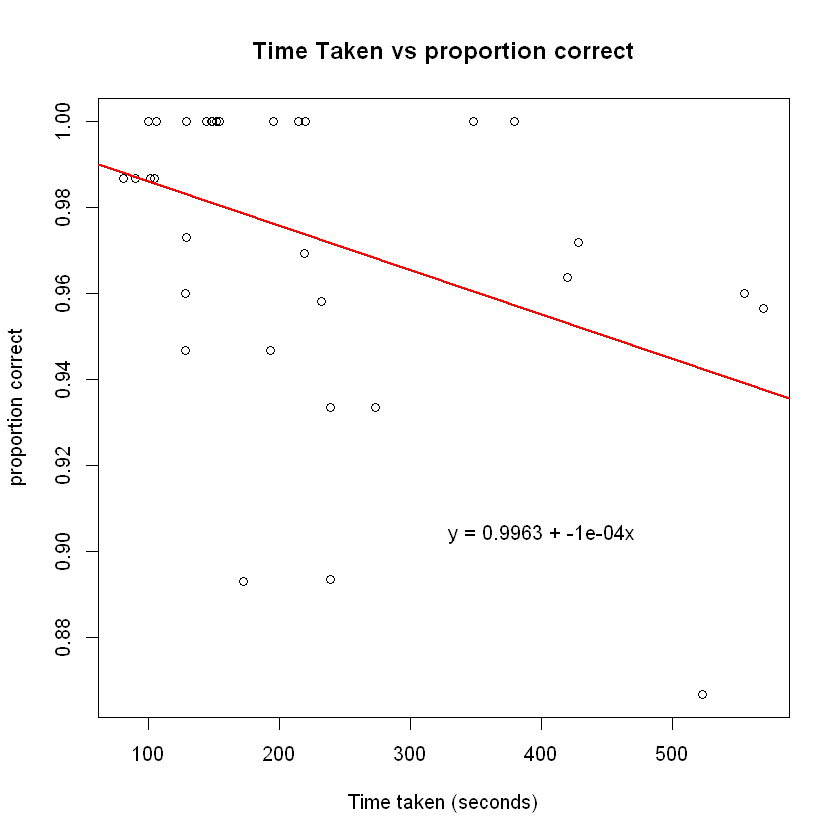

In [45]:
model <- lm(proportion~et, data = untimed)
plot(untimed$et, untimed$proportion, main = "Time Taken vs proportion correct", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model)[1], 4), " + ", round(coef(model)[2], 4), "x")
text(400, .9, eq, pos = 3, offset = 0.5)

In [46]:
summary(model)


Call:
lm(formula = proportion ~ et, data = untimed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08557 -0.01219  0.01464  0.01948  0.04274 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.963e-01  1.074e-02  92.771   <2e-16 ***
et          -1.029e-04  4.157e-05  -2.476   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03273 on 33 degrees of freedom
Multiple R-squared:  0.1566,	Adjusted R-squared:  0.1311 
F-statistic: 6.128 on 1 and 33 DF,  p-value: 0.01861


Our t-stat slope statistic can be found here:

In [47]:
coef(summary(model))["et", "t value"]

[1] -2.475526